# Weekly assignment 1

### Objective
Learn how to clean data and to investigate distributions. 

## Import the data

The data is in two files: 'survey.csv' and 'steps.csv'. The 'steps' file is separated with a semicolon instead of a comma, so that needs to be specified.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

steps = pd.read_csv('steps.csv', sep=';' )
survey = pd.read_csv('survey.csv')

To figure out which column can be used to merge the datasets I print *.info()* for both dataframes. It turns out that 'steps' has too many columns to display all column names like with 'survey'. But the first column turns out to be 'id', which is also present in 'survey'.

In [2]:
steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Columns: 329 entries, id to 13-5-2014
dtypes: float64(328), int64(1)
memory usage: 2.3 MB


In [3]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 929 entries, 0 to 928
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           929 non-null    int64  
 1   city         929 non-null    object 
 2   gender       929 non-null    object 
 3   age          929 non-null    object 
 4   hh_size      929 non-null    int64  
 5   education    929 non-null    int64  
 6   education_1  929 non-null    object 
 7   height       928 non-null    float64
 8   weight       927 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 65.4+ KB


The next step is merging both dataframes into a new dataframe, called 'df_combi'.

In [4]:
df_combi = survey.merge(steps, on='id')
df_combi.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To check for weird values I use *.describe()*.

In [5]:
df_combi.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,929.000000,929.000000,929.000000,928.000000,927.000000,24.000000,243.000000,278.000000,296.000000,354.000000,...,83.000000,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0
mean,465.000000,2.342304,2.530678,171.668103,72.833873,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,...,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN
std,268.323499,1.226129,1.274491,9.080235,25.902717,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,...,6923.674171,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN
min,1.000000,1.000000,1.000000,145.000000,6.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,726.000000,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN
25%,233.000000,1.000000,1.000000,165.000000,61.000000,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,...,3538.000000,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN
50%,465.000000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,5386.000000,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN
75%,697.000000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,...,11811.000000,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN
max,929.000000,11.000000,5.000000,195.000000,700.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN


The 'weight' column has some extreme low and high values, so those need to be removed. I picked 30 and 300 as more realistic ends for the 'weight' value and re-created the dataframe. Sorting quickly shows the new highest and lowest values.

In [6]:
df_combi = df_combi[(df_combi['weight'] > 30) & (df_combi['weight'] < 300)]
df_combi['weight'].sort_values()

102     37.0
67      45.0
630     45.0
198     45.0
122     45.0
       ...  
583    140.0
323    140.0
257    149.0
549    155.0
820    155.0
Name: weight, Length: 924, dtype: float64

Create the variable mean steps per participant. 

In [7]:
df_combi['mean'] = df_combi.loc[:, '20-6-2013':'13-5-2014'].mean(axis=1)
df_combi.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


## The analysis

#### An analysis of mean steps per participant:
- Graph of the distribution (e.g., histogram, box plot, density plot, violin plot)
- Summary statistics (measure of central tendency and variation, e.g., mean, median, variance)
- Verbal description of the distribution, including commenting on normality, skewness, outliers, etc.

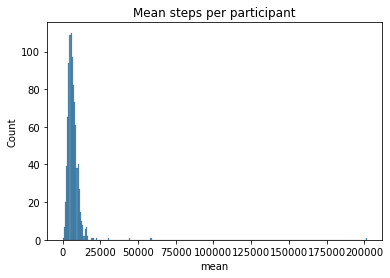

In [8]:
df_combi['mean'].name = 'Mean steps' #Labeling the variable for plotting
df_combi = df_combi.dropna(subset=['mean'])
sns.histplot(df_combi['mean'], kde=False) 
plt.title('Mean steps per participant')
plt.show()

Based on the histogram it is clear that there are a few massive outliers on the high end. This is supported by the summary statistics printed with *.describe()*: The *max* value is 201722.6, while the value for the 75% is only 8366.83. On the low end there is also a big difference between the smallest value and the 25% (4.0 to 4633.9) but that is still a lot closer. A quick look at the highest and lowest 5 numbers with *.sort_values()* shows that the highest mean is more than 3 times as big as the second highest mean. 

In [9]:
df_combi['mean'].describe()

count       920.000000
mean       7021.510401
std        7406.689567
min           4.000000
25%        4633.941050
50%        6244.931602
75%        8366.832967
max      201722.600000
Name: mean, dtype: float64

In [10]:
df_combi['mean'].sort_values()

616         4.000000
120       842.000000
766      1032.500000
866      1210.000000
30       1218.500000
           ...      
109     22842.716846
205     30373.808917
881     43912.307692
95      58491.067568
740    201722.600000
Name: mean, Length: 920, dtype: float64

Let's try to remove the outliers. The biggest number is very likely an error. The average amount of steps can be anywhere between 90 - 180 per minute, depending on if someone is walking or running. Even assuming someone is always running while wearing the tracker, they'd need to run about 18 hours *on average* to reach 201722.6 steps on average over the period of time in the dataset. The second highest mean could be true, assuming 100 steps per minute works out to 9.78 hours of walking on average, so someone with a very physical job who wore the tracker every day.

In [42]:
df_combi = df_combi[(df_combi['mean'] < 60000)]

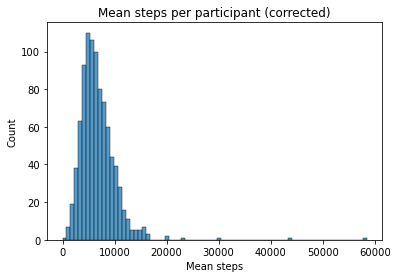

In [43]:
df_combi['mean'].name = 'Mean steps' #Labeling the variable for plotting
sns.histplot(df_combi['mean'], kde=False) 
plt.title('Mean steps per participant (corrected)')
plt.show()

Even though the remaining extremes might not be errors, it would be interesting to see the majority of the data a bit closer. But since I don't know if the extremes are errors, I'll make a new dataframe for the next graph.

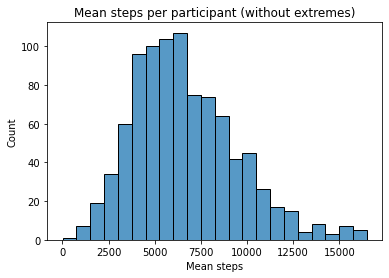

In [44]:
df_2 = df_combi[(df_combi['mean'] < 17500)]
df_2['mean'].name = 'Mean steps' #Labeling the variable for plotting
sns.histplot(df_2['mean'], kde=False) 
plt.title('Mean steps per participant (without extremes)')
plt.show()

Even with the biggest outliers removed, the distribution is still skewed right, though the shape is a lot closer to a normal distribution.

Below some statistics, for the entire dataset:

In [48]:
steps_mean = df_combi['mean'].mean()
steps_median = df_combi['mean'].median()
steps_var = df_combi['mean'].var()
steps_std = df_combi['mean'].std()

print(f'The mean amount of mean steps is: {steps_mean}')
print(f'The median amount of mean steps is: {steps_median}')
print(f'The variance of the amount of mean steps is: {steps_var}')
print(f'The standard deviation of the amount of mean steps is: {steps_std}')

The mean amount of mean steps is: 6809.648497585308
The median amount of mean steps is: 6244.857142857143
The variance of the amount of mean steps is: 13579197.415924795
The standard deviation of the amount of mean steps is: 3684.996257247054


And the same, but without the outliers:

In [51]:
steps_mean_2 = df_2['mean'].mean()
steps_median_2 = df_2['mean'].median()
steps_var_2 = df_2['mean'].var()
steps_std_2 = df_2['mean'].std()

print(f'The mean amount of mean steps is: {steps_mean_2}')
print(f'The median amount of mean steps is: {steps_median_2}')
print(f'The variance of the amount of mean steps is: {steps_var_2}')
print(f'The standard deviation of the amount of mean steps is: {steps_std_2}')

The mean amount of mean steps is: 6639.802340101819
The median amount of mean steps is: 6235.238095238095
The variance of the amount of mean steps is: 7920168.2875329135
The standard deviation of the amount of mean steps is: 2814.2793549207076


#### The relation of mean steps per participant with a categorical variable with two levels (e.g. gender, weekday vs weekend)
- Graph of the relation (e.g. histograms, box plots, density plots, violin plots). Try a different plot this time.
- Verbal description of the relation


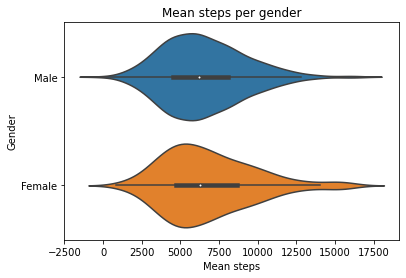

In [52]:
df_2['gender'].name = 'Gender'
sns.violinplot(x=df_2['mean'], y=df_2['gender'])
plt.title('Mean steps per gender')
plt.show()

There isn't a very big difference between men and women for the mean steps. The distribution of 'Male' is more symmetrical, only a little bit right-skewed, while the 'Female' distribution is more clearly right-skewed. 

To be complete below is also the same graph with the outliers in the steps included. Most outliers seem to be from women. Though it's a bit harder to see, the 'point' of the 'Male' graph is also a little further out than in the graph above, so there is at least one man in the 'outliers' group. 

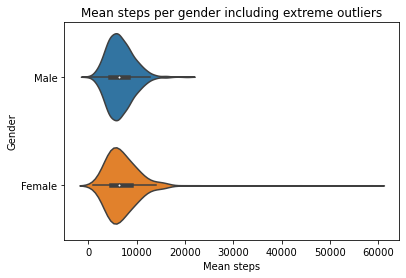

In [53]:
df_combi['gender'].name = 'Gender'
sns.violinplot(x=df_combi['mean'], y=df_combi['gender'])
plt.title('Mean steps per gender including extreme outliers')
plt.show()


#### The relation between two categorical variables
- Graph of the relation (bar plot)
- Cross table with relevant percentages
- Verbal description of the relation

I looked at the relationship between age and gender. In al but one age group there were more men than women. The exeption was 45-54 year olds. But it was very close in both 35-44 and 55-64. The two youngest age groups and the oldest in comparison have clearly more men. 

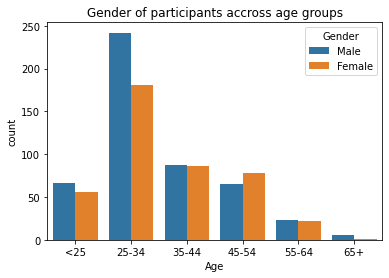

In [75]:
df_2['age'].name = 'Age'
sns.countplot(x=df_2['age'], hue=df_2['gender'], order=['<25', '25-34', '35-44', '45-54', '55-64', '65+'])
plt.title('Gender of participants accross age groups')
plt.show()

If you look at the bar pot, it seems that the biggest difference of men and women is in the 35-34 age group. But with a crosstab with percentages, you see that actually the 65+ group has the biggest difference, but because they have so much less participants this is a lot harder to see. 

In [76]:
pd.crosstab(df_2["age"],df_2["gender"], normalize="index")

Gender,Female,Male
Age,,
25-34,0.427896,0.572104
35-44,0.497110,0.502890
45-54,0.545455,0.454545
55-64,0.488889,0.511111
65+,0.142857,0.857143
<25,0.459016,0.540984
